In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
# Rename columns
df_cleaned = df.rename(columns={'v1': 'label', 'v2': 'message'})

In [4]:
# Drop unnecessary columns
df_cleaned = df_cleaned.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])


In [5]:
# Display the first few rows
print(df_cleaned)

     label                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


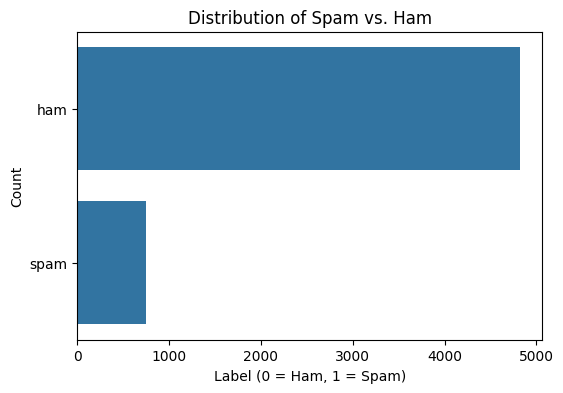

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(df_cleaned['label'])
plt.title('Distribution of Spam vs. Ham')
plt.xlabel('Label (0 = Ham, 1 = Spam)')
plt.ylabel('Count')
plt.show()

In [8]:
df_cleaned.to_csv('cleaned_dataset.csv', index=False)

In [9]:
df_cleaned['label'] = df_cleaned['label'].map({'ham': 0, 'spam': 1})

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_cleaned['message'], df_cleaned['label'], test_size=0.2, random_state=42)

In [11]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [12]:
# Naive Bayes Classifier
model = MultinomialNB()

In [13]:
# Train the model
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [14]:
# Make predictions
y_pred = model.predict(X_test_tfidf)

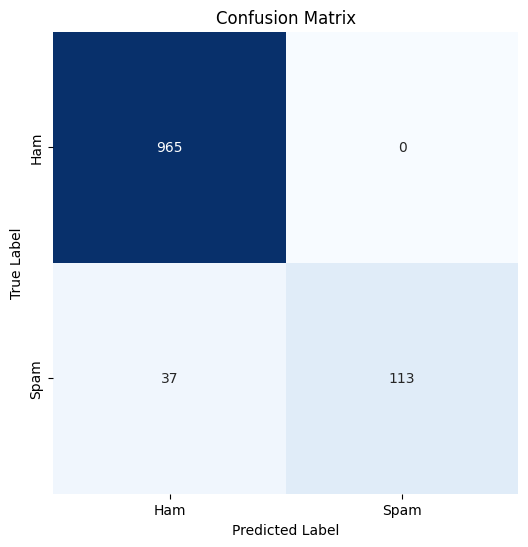

In [15]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [16]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [17]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)

Accuracy: 0.9668161434977578
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [18]:
import pickle

In [19]:
# Save the model to a file
model_filename = 'spam_classifier_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

In [20]:
# Save the TF-IDF vectorizer as well
vectorizer_filename = 'tfidf_vectorizer.pkl'
with open(vectorizer_filename, 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)


In [21]:
print(f'Model saved to {model_filename}')
print(f'TF-IDF vectorizer saved to {vectorizer_filename}')

Model saved to spam_classifier_model.pkl
TF-IDF vectorizer saved to tfidf_vectorizer.pkl


In [22]:
# Load the saved model
with open('spam_classifier_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [23]:
# Load the saved TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'rb') as file:
    loaded_vectorizer = pickle.load(file)


In [24]:
print('Model and vectorizer loaded successfully')

Model and vectorizer loaded successfully


In [25]:
# Example of new SMS messages
new_messages = [
    "Congratulations! You've won a $1,000 Walmart gift card. Go to http://bit.ly/123456 to claim now.",
    "Hey, are we still meeting up later today?"
]

In [26]:
# Transform the new messages using the loaded TF-IDF vectorizer
new_messages_tfidf = loaded_vectorizer.transform(new_messages)

In [27]:
# Predict with the loaded model
new_predictions = loaded_model.predict(new_messages_tfidf)


In [28]:
for msg, pred in zip(new_messages, new_predictions):
    print(f'Message: "{msg}"')
    print(f'Prediction: {"Spam" if pred == 1 else "Ham"}')
    print('-' * 50)

Message: "Congratulations! You've won a $1,000 Walmart gift card. Go to http://bit.ly/123456 to claim now."
Prediction: Spam
--------------------------------------------------
Message: "Hey, are we still meeting up later today?"
Prediction: Ham
--------------------------------------------------
